In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# check null values 
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
# shape of dataset
df.shape

(1000, 8)

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# split the data into dependent and dependent variable

In [8]:
X = df.drop("math_score", axis=1)
y = df['math_score']
X.shape,y.shape

((1000, 7), (1000,))

In [9]:
# applying transformation which is 3 types 

numerical_features=X.select_dtypes(exclude="object").columns
categorical_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


num_pipeline  = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)


cat_pipeline =  Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hotEncoder", OneHotEncoder(handle_unknown="ignore")),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical_pipeline", num_pipeline,numerical_features),
        ("categorical_pipeline",cat_pipeline, categorical_features)
    ]
)





In [10]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['reading_score', 'writing_score'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object'))])

In [11]:
X=preprocessor.fit_transform(X)
X

array([[ 0.19399858,  0.39149181,  2.00129726, ...,  2.08980597,
         0.        ,  2.08588794],
       [ 1.42747598,  1.31326868,  2.00129726, ...,  2.08980597,
         2.08588794,  0.        ],
       [ 1.77010859,  1.64247471,  2.00129726, ...,  2.08980597,
         0.        ,  2.08588794],
       ...,
       [ 0.12547206, -0.20107904,  2.00129726, ...,  0.        ,
         2.08588794,  0.        ],
       [ 0.60515772,  0.58901542,  2.00129726, ...,  2.08980597,
         2.08588794,  0.        ],
       [ 1.15336989,  1.18158627,  2.00129726, ...,  0.        ,
         0.        ,  2.08588794]])

In [12]:
# evaluate metrics for model evaluate 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def model_evaluate(true, predicted):
    mae= mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, mse, rmse, r2_square
    

In [13]:
# split the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [14]:
# Importing libary for model training
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
RandomForestRegressor,
GradientBoostingRegressor,
AdaBoostRegressor
)
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [15]:
# Initiaze the model 
models = {
    "Linear Regressor": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random forest Regressor": RandomForestRegressor(),
    "Adabooting regressor": AdaBoostRegressor(),
    "Grandient Regressor": GradientBoostingRegressor(),
    "catboosting regressor": CatBoostRegressor(),
    "Xgbooting regressor": XGBRegressor(),
    "support vector machine": SVR()
}

In [16]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)


    # prediction with training and testing dataset
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    # Evaluate the model with training and testing dataset
    y_train_mse, y_train_mae, y_train_rmse,y_train_r2 = model_evaluate(y_train, y_train_pred)
    y_test_mse, y_test_mae, y_test_rmse, y_test_r2 = model_evaluate(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("================================================================================================")
    print("="*80)
    print(f"Model Name: {model} ")

    print("Model performance with training dataset")
    print("- MSE: {:.4f} ".format(y_train_mse))
    print("- MAE: {:.4f} ".format(y_train_mae))
    print("- RMSE: {:.4f} ".format(y_train_rmse))
    print("- R2 Score: {:.4f} ".format(y_train_r2))
    
    
    print("Model performance with testing dataset")
    print("- MSE: {:.4f} ".format(y_test_mse))
    print("- MAE: {:.4f} ".format(y_test_mae))
    print("- RMSE: {:.4f} ".format(y_test_rmse))
    print("- R2 Score: {:.4f} ".format(y_test_r2))
    
    r2_list.append(y_test_r2)


    #print("="*35)
print("/n")

    

Linear Regressor
Model Name: LinearRegression() 
Model performance with training dataset
- MSE: 4.2745 
- MAE: 28.6240 
- RMSE: 5.3501 
- R2 Score: 0.8730 
Model performance with testing dataset
- MSE: 4.2203 
- MAE: 29.0047 
- RMSE: 5.3856 
- R2 Score: 0.8808 
Ridge
Model Name: Ridge() 
Model performance with training dataset
- MSE: 4.2650 
- MAE: 28.3366 
- RMSE: 5.3232 
- R2 Score: 0.8743 
Model performance with testing dataset
- MSE: 4.2126 
- MAE: 29.0623 
- RMSE: 5.3909 
- R2 Score: 0.8806 
Lasso
Model Name: Lasso() 
Model performance with training dataset
- MSE: 4.6908 
- MAE: 34.8489 
- RMSE: 5.9033 
- R2 Score: 0.8454 
Model performance with testing dataset
- MSE: 4.6308 
- MAE: 34.9621 
- RMSE: 5.9129 
- R2 Score: 0.8563 
Decision Tree Regressor
Model Name: DecisionTreeRegressor() 
Model performance with training dataset
- MSE: 0.0187 
- MAE: 0.0781 
- RMSE: 0.2795 
- R2 Score: 0.9997 
Model performance with testing dataset
- MSE: 6.1950 
- MAE: 59.9650 
- RMSE: 7.7437 
- R2 

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name','r2 score']).sort_values(by=['r2 score'],ascending=False)

,Model Name,r2 score
0,Linear Regressor,0.880805
1,Ridge,0.880568
6,Grandient Regressor,0.872497
2,Lasso,0.856323
4,Random forest Regressor,0.853591
7,catboosting regressor,0.851632
5,Adabooting regressor,0.847355
8,Xgbooting regressor,0.821220
3,Decision Tree Regressor,0.753574
9,support vector machine,0.687200


In [18]:
# Applying Hyperparameter tunning

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid= {
    "Decision Tree": {'max_features': [None,3,5]},
    "Linear Regressor": {},
    "Ridge": {'alpha': [0.1,1,10]},
    "Lasso": {'alpha': [0.1,1,10]},
    "Random forest Regressor":{'n_estimators':[3,5,7]},
    "Adaboosting Regrssor": {'n_esmtimators': [50,100,300]},
    'Gradient Decent Regressor': {'n_estimators': [50,100,200],'max_depth':[5,7]},
    "catboosting regressor": {'iterations':[1,10,100]},
    "xgboosting regressor": {'n_estimators':[50,100,300]},
    "support vector machine": {}
}

In [25]:
best_models = {}
r2_score_train = []
r2_score_test = []

for model_name, model in models.items():
    if model_name in param_grid:
        search_grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='r2')
        search_grid.fit(X_train, y_train)
        best_models[model_name] = search_grid.best_estimator_
        print(f"Model parameter: {model} : {search_grid.best_params_} ")
    else:
        best_models[model_name] = model
        best_models[model_name].fit(X_train,y_train)

    # prediction with training and testing dataset
    y_train_grid_score = best_models[model_name].predict(X_train)
    y_test_grid_score = best_models[model_name].predict(X_test)
    
    
    # Evaluate the model with training and testing dataset
    y_train_grid_mse, y_train_grid_mae, y_train_grid_rmse, y_train_grid_r2 = model_evaluate(y_train, y_train_grid_score)
    y_test_grid_mse, y_test_grid_mae, y_test_grid_rmse, y_test_grid_r2 = model_evaluate(y_test, y_test_grid_score)


    print("="*80)
    print(f"Best model name: {best_models[model_name]}")

    print("=================================================================================================================")

    print("Model performance with training dataset")
    print("- MSE: {:.4f} ".format(y_train_grid_mse))
    print("- MAE: {:.4f} ".format(y_train_grid_mae))
    print("- RMSE: {:.4f} ".format(y_train_grid_rmse))
    print("- R2 Square: {:.4f} ".format(y_train_grid_r2))

    print("Model performance with testing dataset")
    print("- MSE: {:.4f} ".format(y_test_grid_mse))
    print("- MAE: {:.4f} ".format(y_test_grid_mae))
    print("- RMSE: {:.4f} ".format(y_test_grid_rmse))
    print("- R2 Square: {:.4f} ".format(y_test_grid_r2))
    r2_score_train.append(y_train_grid_r2)
    r2_score_test.append(y_test_grid_r2)


print("="*35)
print("/n")

    
    

    
    

        

Model parameter: LinearRegression() : {} 
Best model name: LinearRegression()
Model performance with training dataset
- MSE: 4.2745 
- MAE: 28.6240 
- RMSE: 5.3501 
- R2 Square: 0.8730 
Model performance with testing dataset
- MSE: 4.2203 
- MAE: 29.0047 
- RMSE: 5.3856 
- R2 Square: 0.8808 
Model parameter: Ridge() : {'alpha': 0.1} 
Best model name: Ridge(alpha=0.1)
Model performance with training dataset
- MSE: 4.2665 
- MAE: 28.3349 
- RMSE: 5.3231 
- R2 Square: 0.8743 
Model performance with testing dataset
- MSE: 4.2145 
- MAE: 29.0915 
- RMSE: 5.3937 
- R2 Square: 0.8804 
Model parameter: Lasso() : {'alpha': 0.1} 
Best model name: Lasso(alpha=0.1)
Model performance with training dataset
- MSE: 4.2764 
- MAE: 28.4994 
- RMSE: 5.3385 
- R2 Square: 0.8736 
Model performance with testing dataset
- MSE: 4.1751 
- MAE: 28.6928 
- RMSE: 5.3566 
- R2 Square: 0.8821 
Best model name: DecisionTreeRegressor()
Model performance with training dataset
- MSE: 0.0187 
- MAE: 0.0781 
- RMSE: 0.27

In [33]:
pd.DataFrame(list(zip(best_models,r2_score_train,r2_score_test,)),columns=['Best Model Name','r2 score train','r2 score test',]).sort_values(by=['r2 score test'],ascending=False)

,Best Model Name,r2 score train,r2 score test
2,Lasso,0.873588,0.882087
0,Linear Regressor,0.873035,0.880805
1,Ridge,0.874317,0.880448
6,Grandient Regressor,0.905040,0.872032
5,Adabooting regressor,0.853677,0.853847
7,catboosting regressor,0.942285,0.845898
8,Xgbooting regressor,0.995500,0.821220
4,Random forest Regressor,0.954447,0.813683
3,Decision Tree Regressor,0.999653,0.719937
9,support vector machine,0.755776,0.687200


In [34]:
# after applying hyperparameter best model found "Lasso"

In [35]:
ls_model = Lasso()
lasso_grid = {
    'alpha':[0.1,10]
}
lasso_param = GridSearchCV(ls_model,lasso_grid,cv=5,scoring='r2')

In [37]:
lasso_fit=lasso_param.fit(X_train, y_train)
lasso_fit

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 10]},
             scoring='r2')

In [39]:
ls_pred=lasso_fit.predict(X_test)
ls_score = r2_score(y_test,ls_pred)*100
print(f"Model score is: {ls_score} ")

Model score is: 88.2086921452269 


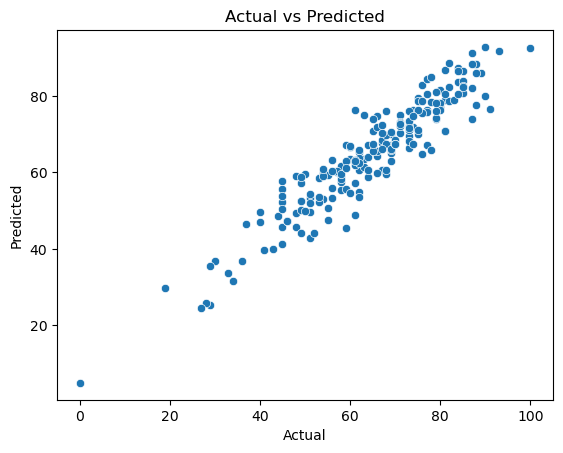

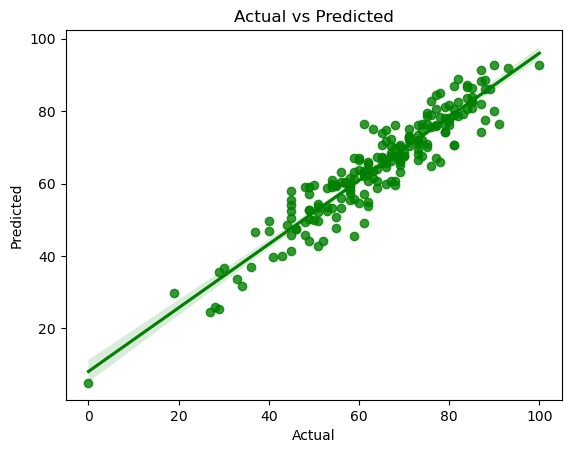

In [43]:
# ploting actual vs prediction
sns.scatterplot(x=y_test,y=ls_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()




sns.regplot(x=y_test,y=ls_pred,color='g')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

C:\Users\ramn\AppData\Local\Temp\ipykernel_19676\945660598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y_test,kde=True, hist=False)
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


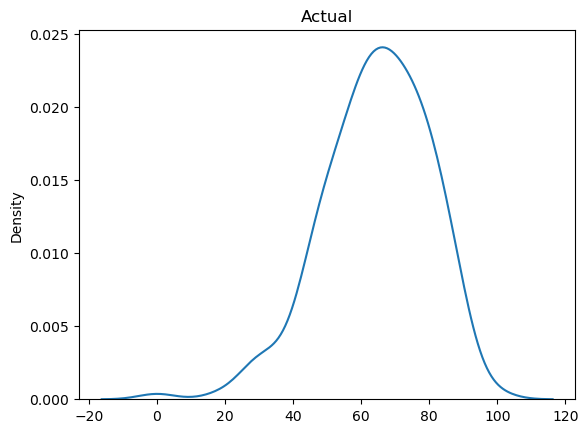

C:\Users\ramn\AppData\Local\Temp\ipykernel_19676\945660598.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ls_pred,kde=True, hist=False,color='g')
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


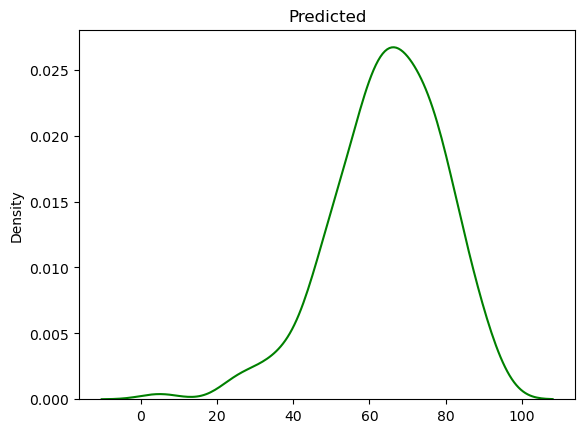

In [47]:
sns.distplot(x=y_test,kde=True, hist=False)
plt.title("Actual")
plt.show()


print("==============================================")

sns.distplot(x=ls_pred,kde=True, hist=False,color='g')
plt.title("Predicted")
plt.show()

In [48]:
# Difference between actual vs prediction
pd.DataFrame({
    'actual': y_test, 'prediction': ls_pred, "Difference": y_test - ls_pred
})

,actual,prediction,Difference
521,91,76.487415,14.512585
737,53,58.645233,-5.645233
740,80,77.226523,2.773477
660,74,76.426131,-2.426131
411,84,87.211346,-3.211346
...,...,...,...
408,52,44.127513,7.872487
332,62,62.519146,-0.519146
208,74,67.470853,6.529147
613,65,67.329326,-2.329326
